In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import seaborn as sns

In [34]:
dataFile = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")
dataFile.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220.0,3074.0,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431.0,26030.0,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080.0,4134.0,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [38]:
dataFile['Date'] = pd.to_datetime(dataFile['Date'])
target_year = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
wantedCategory = ["PROSTITUTION"]

In [36]:
target_years_idx = dataFile['Date'].dt.year.isin(target_year)
category_idx = dataFile["Category"].isin(wantedCategory)

categoryData = dataFile[target_years_idx & category_idx]

categoryData = categoryData.groupby(['Date']).size().reset_index(name= "counts")

categoryData["Year"] = categoryData["Date"].dt.year
categoryData

categoryData = categoryData.groupby(['Year']).size().reset_index(name= "counts")
categoryData

,Year,counts
0,2004,251
1,2005,249
2,2006,257
3,2007,293
4,2008,297
5,2009,265
6,2010,280
7,2011,229
8,2012,172
9,2013,194


Did prostitution reach its peak in 2008? To answer this question, we delve into data collected by the San Francisco Police Department spanning from 2003 to 2017. This dataset encompasses various crime categories, each logged with timestamps and geographical coordinates.
Focusing specifically on the prostitution category within the years 2004 to 2013, intriguing trends emerge. It appears that the incidence of prostitution-related crimes surged in 2007 and 2008, only to steadily decline thereafter. By 2012, the data reveals the lowest recorded rate of such offenses over the preceding decade.
In this exploration, we aim to dissect the temporal patterns of prostitution crimes, shedding light on shifts in societal behaviors and law enforcement efforts over the examined timeframe.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


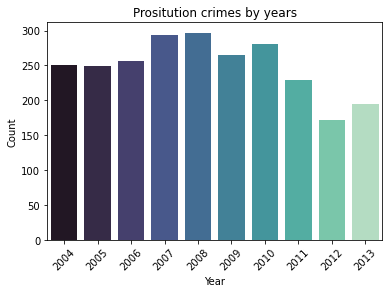

In [46]:
sns.barplot(categoryData["Year"], categoryData["counts"], data=categoryData, dodge=False, palette='mako')

plt.title('Prositution crimes by years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend().remove() 
plt.show()

In [49]:
categoryData

,Year,counts
0,2004,251
1,2005,249
2,2006,257
3,2007,293
4,2008,297
5,2009,265
6,2010,280
7,2011,229
8,2012,172
9,2013,194


2008 is the year with the most cases of prostitution as it reaches 293 incidents. 2012 the number of incidents is significally lower at 172. 